## Data Import and Cleaning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import joblib

# Configurations
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})


In [ ]:
# Check the head

df = pd.read_csv('privacy_data.csv')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q1.1,Q2.1,Q3.1,Q4.1,Q5.1,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13
0,1. What's your age?,What's your Gender,What's your educational level?,What's your occupation?,Frequency of Online Platform Usage,I am concerned about how much personal informa...,I trust that my privacy is adequately protecte...,The security of my personal data on online pla...,I understand how online platforms use Big Data...,I trust that online service providers handle m...,I am comfortable with how my data is used in B...,I believe online service providers are clear a...,I am aware of ethical issues involved in Big D...,I feel well informed about my rights regarding...,I know how to report concerns about unethical ...,I believe the benefits of Big Data Analytics j...,Online platforms should limit their use of Big...,Public discussions and education about Big Dat...
1,25-34,Male,Master's Degree,Employed Part-Time,Daily,A little,Extremely inadequate,Strongly disagree,Strongly disagree,Somewhat disagree,Extremely uncomfortable,Strongly disagree,Strongly disagree,NaN,NaN,Strongly disagree,Strongly agree,Strongly disagree
2,35-44,Female,Master's Degree,Employed Full-Time,Daily,A great deal,Neither adequate nor inadequate,Strongly agree,Strongly agree,Strongly agree,Extremely comfortable,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
3,55-64,Non-binary / third gender,No formal education,Homemaker,Never,None at all,Extremely inadequate,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Somewhat comfortable,Somewhat agree,Somewhat disagree,Strongly agree,Neither agree nor disagree,Somewhat disagree,Strongly agree,Neither agree nor disagree
4,35-44,Male,Master's Degree,Student,Daily,None at all,Extremely inadequate,Strongly disagree,Strongly disagree,Strongly disagree,Neither comfortable nor uncomfortable,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree


In [ ]:
#from the df above, make the first row the column names then drop the row

df = df.rename(columns=df.iloc[0])
df = df.drop(df.index[0])
df.head()

,1. What's your age?,What's your Gender,What's your educational level?,What's your occupation?,Frequency of Online Platform Usage,I am concerned about how much personal information online platforms collect from me.,I trust that my privacy is adequately protected on online platforms,The security of my personal data on online platforms often worries me.,I understand how online platforms use Big Data Analytics to collect personal information.,I trust that online service providers handle my personal data ethically.,I am comfortable with how my data is used in Big Data Analytics by online service providers.,I believe online service providers are clear about how they use Big Data Analytics.,I am aware of ethical issues involved in Big Data Analytics.,I feel well informed about my rights regarding data collected by online platforms using Big Data Analytics.,I know how to report concerns about unethical use of Big Data Analytics.,I believe the benefits of Big Data Analytics justify any privacy concerns.,Online platforms should limit their use of Big Data Analytics to better protect user privacy.,Public discussions and education about Big Data Analytics' privacy and ethics are important.
1,25-34,Male,Master's Degree,Employed Part-Time,Daily,A little,Extremely inadequate,Strongly disagree,Strongly disagree,Somewhat disagree,Extremely uncomfortable,Strongly disagree,Strongly disagree,NaN,NaN,Strongly disagree,Strongly agree,Strongly disagree
2,35-44,Female,Master's Degree,Employed Full-Time,Daily,A great deal,Neither adequate nor inadequate,Strongly agree,Strongly agree,Strongly agree,Extremely comfortable,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
3,55-64,Non-binary / third gender,No formal education,Homemaker,Never,None at all,Extremely inadequate,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Somewhat comfortable,Somewhat agree,Somewhat disagree,Strongly agree,Neither agree nor disagree,Somewhat disagree,Strongly agree,Neither agree nor disagree
4,35-44,Male,Master's Degree,Student,Daily,None at all,Extremely inadequate,Strongly disagree,Strongly disagree,Strongly disagree,Neither comfortable nor uncomfortable,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
5,25-34,Male,Master's Degree,Employed Full-Time,Daily,A lot,Extremely inadequate,Somewhat disagree,Strongly disagree,Somewhat disagree,Somewhat uncomfortable,Strongly disagree,Strongly disagree,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,Strongly agree,Strongly agree


In [ ]:
df.columns

Index(['1. What's your age?', 'What's your Gender',
       'What's your educational level?', 'What's your occupation?',
       'Frequency of Online Platform Usage',
       'I am concerned about how much personal information online platforms collect from me.',
       'I trust that my privacy is adequately protected on online platforms',
       'The security of my personal data on online platforms often worries me.',
       'I understand how online platforms use Big Data Analytics to collect personal information.',
       'I trust that online service providers handle my personal data ethically.',
       'I am comfortable with how my data is used in Big Data Analytics by online service providers.',
       'I believe online service providers are clear about how they use Big Data Analytics.',
       'I am aware of ethical issues involved in Big Data Analytics.',
       'I feel well informed about my rights regarding data collected by online platforms using Big Data Analytics.',
       'I kn

In [ ]:
# Define the desired column names in lowercase
new_column_names = [
    'age', 'gender', 'education', 'occupation', 'frequency', 'concerned', 'trust_privacy',
    'security_worries', 'understand_analytics', 'trust_ethical', 'comfort_analytics',
    'clarity', 'awareness', 'informed_rights', 'reporting', 'justification',
    'limitation', 'education_privacy_ethics'
]

# Rename the columns of the DataFrame to lowercase names
df.columns = new_column_names

df.head()

,age,gender,education,occupation,frequency,concerned,trust_privacy,security_worries,understand_analytics,trust_ethical,comfort_analytics,clarity,awareness,informed_rights,reporting,justification,limitation,education_privacy_ethics
1,25-34,Male,Master's Degree,Employed Part-Time,Daily,A little,Extremely inadequate,Strongly disagree,Strongly disagree,Somewhat disagree,Extremely uncomfortable,Strongly disagree,Strongly disagree,NaN,NaN,Strongly disagree,Strongly agree,Strongly disagree
2,35-44,Female,Master's Degree,Employed Full-Time,Daily,A great deal,Neither adequate nor inadequate,Strongly agree,Strongly agree,Strongly agree,Extremely comfortable,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
3,55-64,Non-binary / third gender,No formal education,Homemaker,Never,None at all,Extremely inadequate,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Somewhat comfortable,Somewhat agree,Somewhat disagree,Strongly agree,Neither agree nor disagree,Somewhat disagree,Strongly agree,Neither agree nor disagree
4,35-44,Male,Master's Degree,Student,Daily,None at all,Extremely inadequate,Strongly disagree,Strongly disagree,Strongly disagree,Neither comfortable nor uncomfortable,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
5,25-34,Male,Master's Degree,Employed Full-Time,Daily,A lot,Extremely inadequate,Somewhat disagree,Strongly disagree,Somewhat disagree,Somewhat uncomfortable,Strongly disagree,Strongly disagree,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,Strongly agree,Strongly agree


In [ ]:
#check for no. of unique values for each of the columns

for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")

Column 'age' has 5 unique values.
Column 'gender' has 3 unique values.
Column 'education' has 7 unique values.
Column 'occupation' has 6 unique values.
Column 'frequency' has 5 unique values.
Column 'concerned' has 5 unique values.
Column 'trust_privacy' has 5 unique values.
Column 'security_worries' has 5 unique values.
Column 'understand_analytics' has 5 unique values.
Column 'trust_ethical' has 5 unique values.
Column 'comfort_analytics' has 5 unique values.
Column 'clarity' has 5 unique values.
Column 'awareness' has 5 unique values.
Column 'informed_rights' has 5 unique values.
Column 'reporting' has 5 unique values.
Column 'justification' has 5 unique values.
Column 'limitation' has 5 unique values.
Column 'education_privacy_ethics' has 5 unique values.


In [ ]:
#check for unique values for each of the columns

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' has the following unique values:")
    print(unique_values, '\n\n')


Column 'age' has the following unique values:
['25-34' '35-44' '55-64' '18-24' '45-54'] 


Column 'gender' has the following unique values:
['Male' 'Female' 'Non-binary / third gender'] 


Column 'education' has the following unique values:
["Master's Degree" 'No formal education' "Bachelor's Degree"
 'Some College' 'High School Graduate' 'Doctorate or higher'
 'Some High School'] 


Column 'occupation' has the following unique values:
['Employed Part-Time' 'Employed Full-Time' 'Homemaker' 'Student'
 'Unemployed' 'Retired'] 


Column 'frequency' has the following unique values:
['Daily' 'Never' 'Weekly' 'Monthly' 'Rarely' nan] 


Column 'concerned' has the following unique values:
['A little' 'A great deal' 'None at all' 'A lot' 'A moderate amount'] 


Column 'trust_privacy' has the following unique values:
['Extremely inadequate' 'Neither adequate nor inadequate'
 'Somewhat adequate' 'Somewhat inadequate' 'Extremely adequate'] 


Column 'security_worries' has the following unique valu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 1 to 403
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       403 non-null    object
 1   gender                    403 non-null    object
 2   education                 403 non-null    object
 3   occupation                403 non-null    object
 4   frequency                 402 non-null    object
 5   concerned                 403 non-null    object
 6   trust_privacy             403 non-null    object
 7   security_worries          402 non-null    object
 8   understand_analytics      403 non-null    object
 9   trust_ethical             403 non-null    object
 10  comfort_analytics         403 non-null    object
 11  clarity                   403 non-null    object
 12  awareness                 403 non-null    object
 13  informed_rights           402 non-null    object
 14  reporting                 

In [ ]:
df.dropna(inplace = True)

print(df.shape)

(400, 18)


### Data Analysis

In [ ]:
# To display the unique Value counts

for i in df.columns:
    display(df.groupby(i).count().T.head(1).reset_index().drop('index',axis=1))

age,18-24,25-34,35-44,45-54,55-64
0,54,306,29,4,7


gender,Female,Male,Non-binary / third gender
0,218,181,1


education,Bachelor's Degree,Doctorate or higher,High School Graduate,Master's Degree,No formal education,Some College,Some High School
0,306,4,17,40,7,21,5


occupation,Employed Full-Time,Employed Part-Time,Homemaker,Retired,Student,Unemployed
0,304,38,6,6,33,13


frequency,Daily,Monthly,Never,Rarely,Weekly
0,366,2,1,3,28


concerned,A great deal,A little,A lot,A moderate amount,None at all
0,18,141,95,132,14


trust_privacy,Extremely adequate,Extremely inadequate,Neither adequate nor inadequate,Somewhat adequate,Somewhat inadequate
0,14,11,131,138,106


security_worries,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Strongly agree,Strongly disagree
0,75,242,41,34,8


understand_analytics,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Strongly agree,Strongly disagree
0,124,197,49,24,6


trust_ethical,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Strongly agree,Strongly disagree
0,111,182,76,25,6


comfort_analytics,Extremely comfortable,Extremely uncomfortable,Neither comfortable nor uncomfortable,Somewhat comfortable,Somewhat uncomfortable
0,15,8,120,184,73


clarity,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Strongly agree,Strongly disagree
0,144,163,52,33,8


awareness,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Strongly agree,Strongly disagree
0,133,168,76,18,5


informed_rights,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Strongly agree,Strongly disagree
0,141,182,46,27,4


reporting,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Strongly agree,Strongly disagree
0,121,175,55,40,9


justification,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Strongly agree,Strongly disagree
0,142,119,109,23,7


limitation,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Strongly agree,Strongly disagree
0,65,259,24,41,11


education_privacy_ethics,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Strongly agree,Strongly disagree
0,23,188,7,180,2


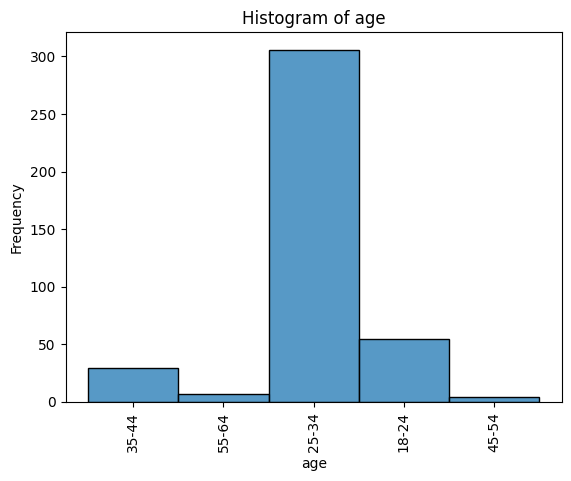

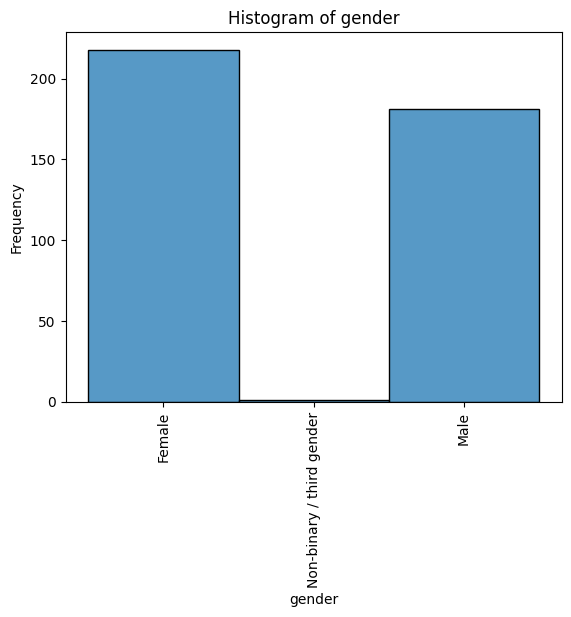

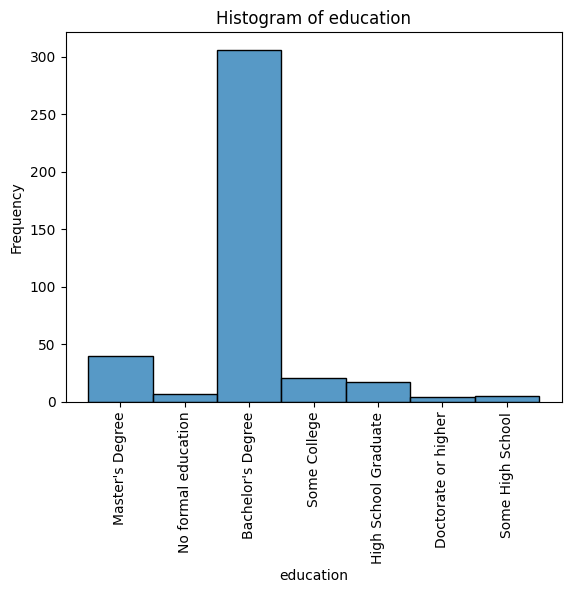

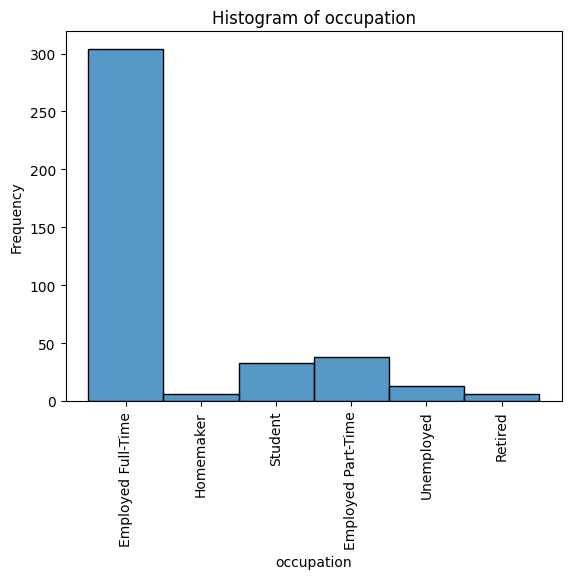

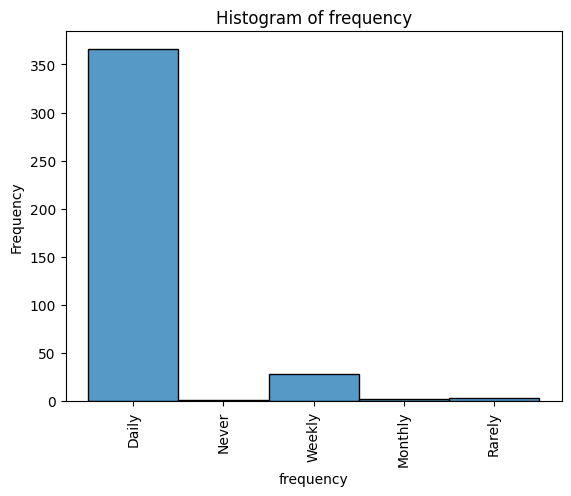

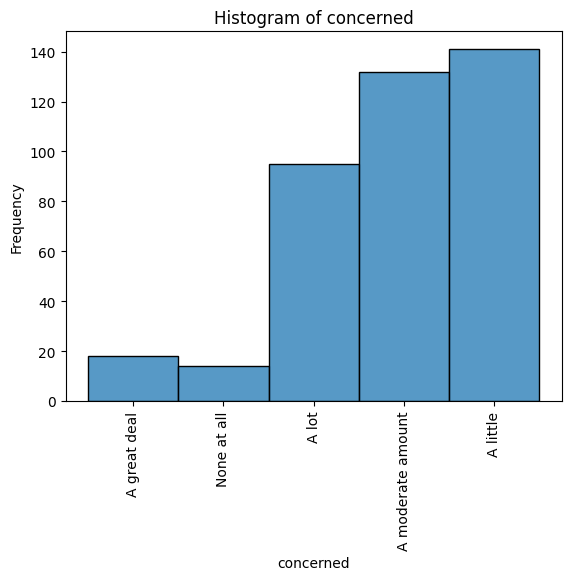

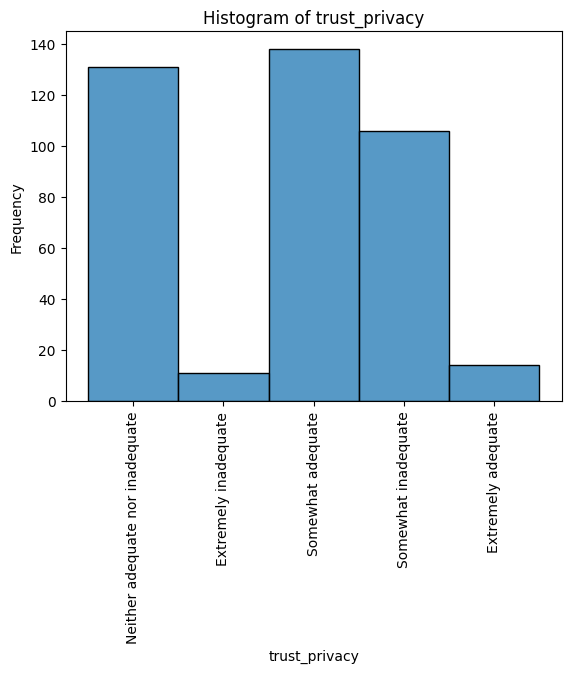

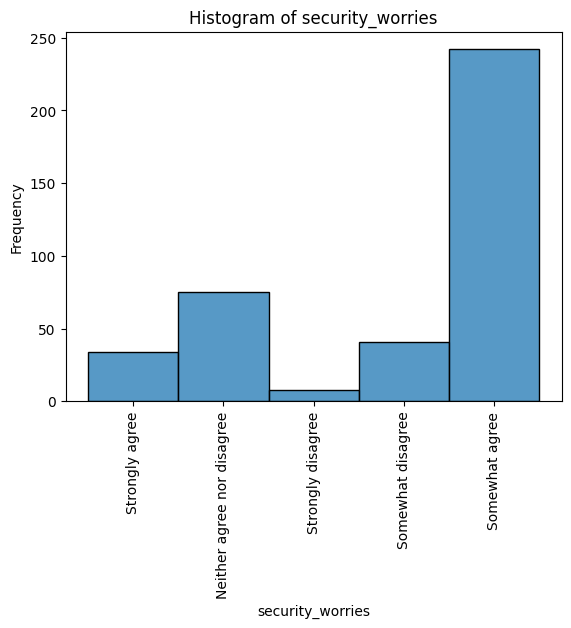

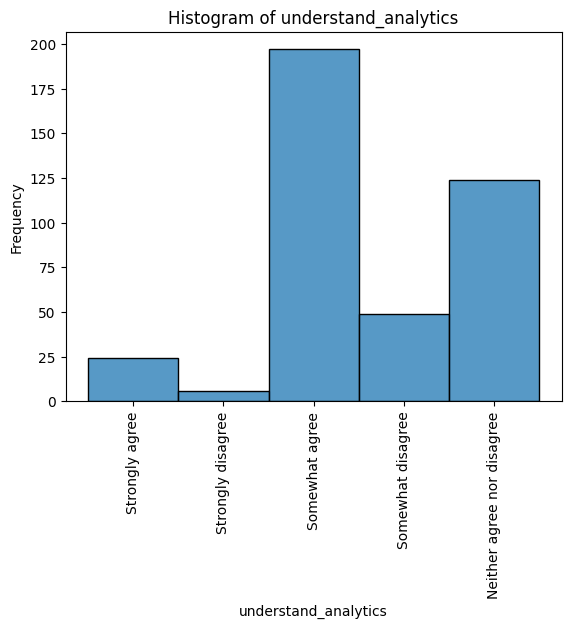

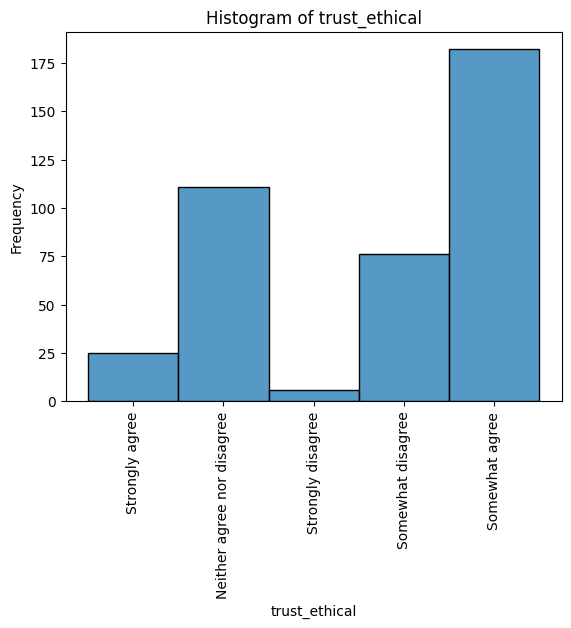

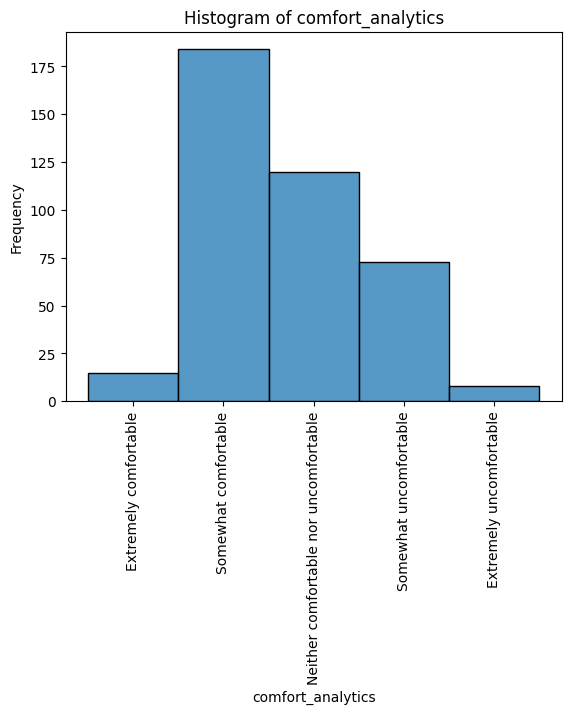

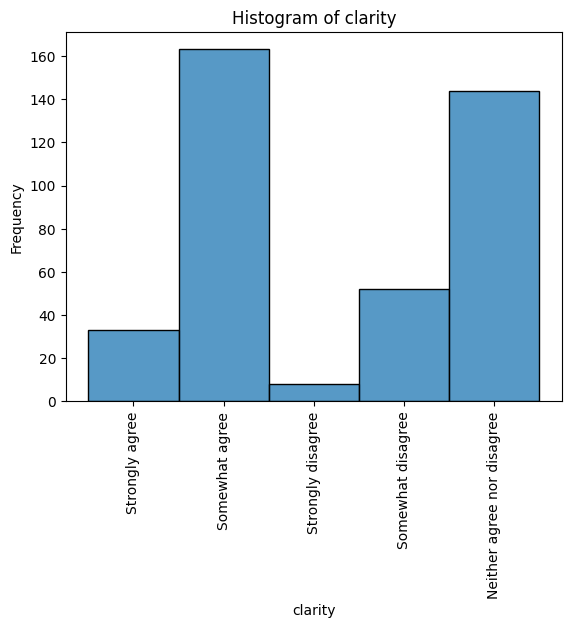

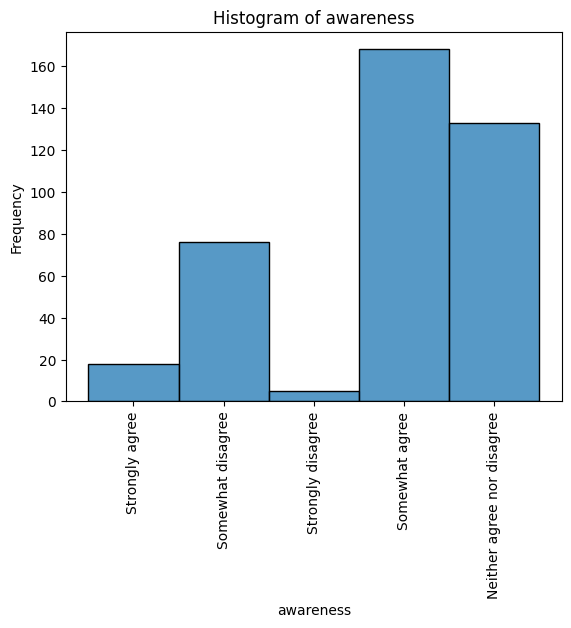

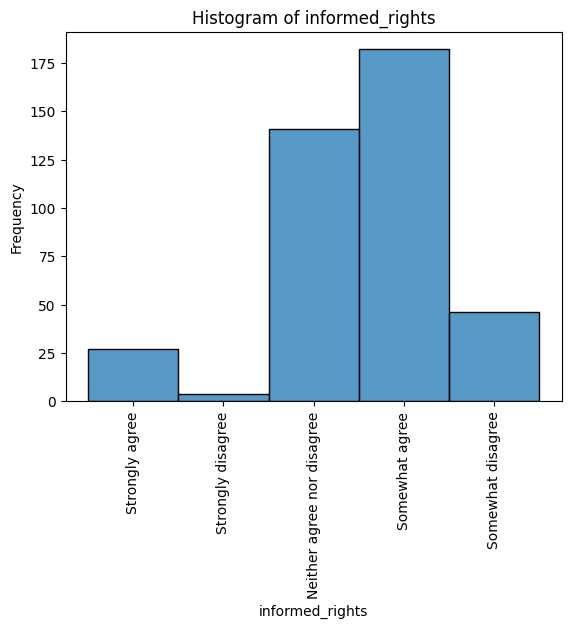

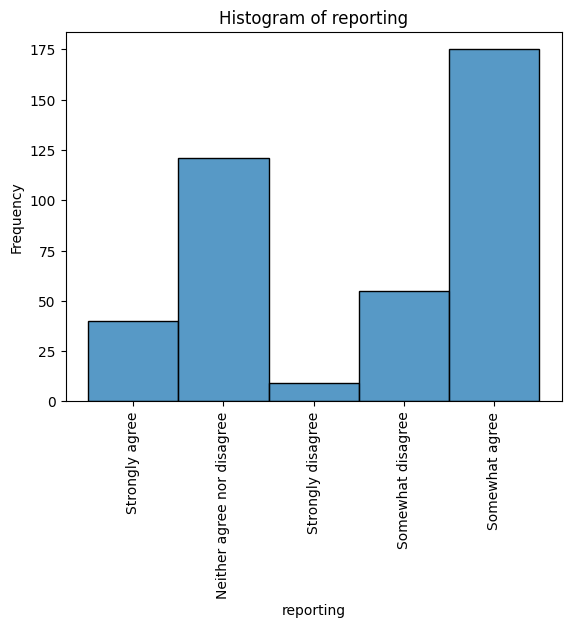

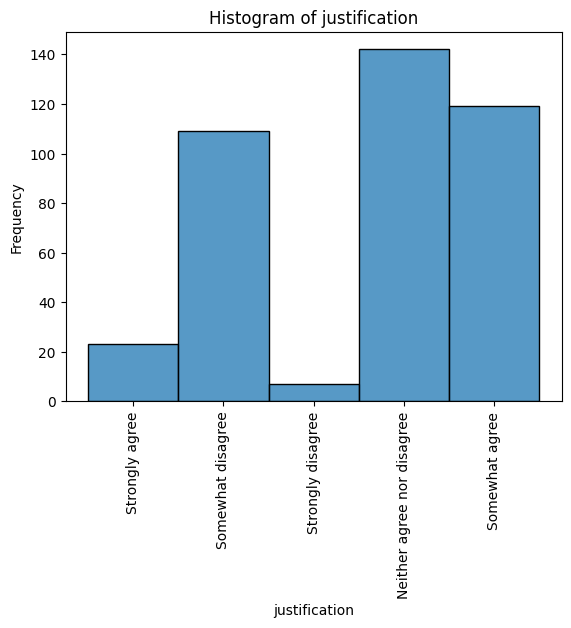

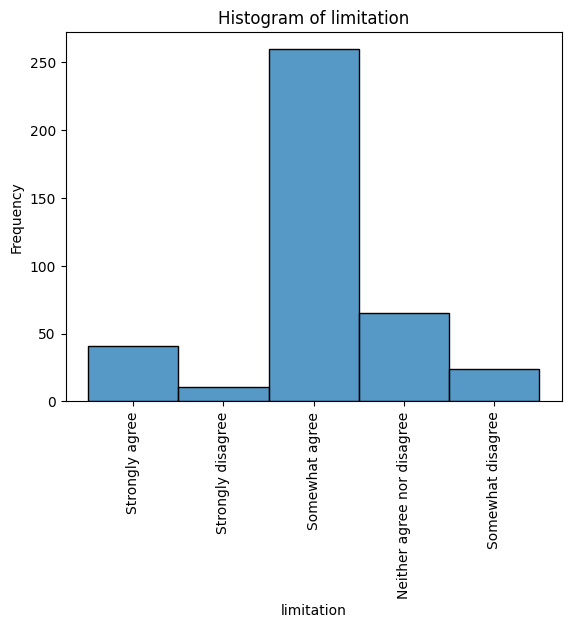

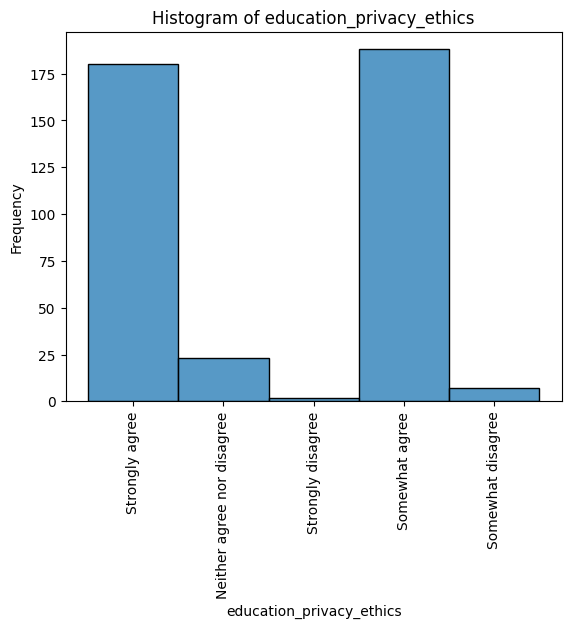

In [ ]:
# Distribution
# Creating a copy of the DataFrame for safe manipulation
dataframe_copy = df.copy()

# Looping over each column in the DataFrame
for column_name in dataframe_copy.columns:
    # Plotting histogram for each numerical variable
    sns.histplot(dataframe_copy[column_name], bins=10)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90, size=10)
    plt.show()


## Preprocessing and Modelling

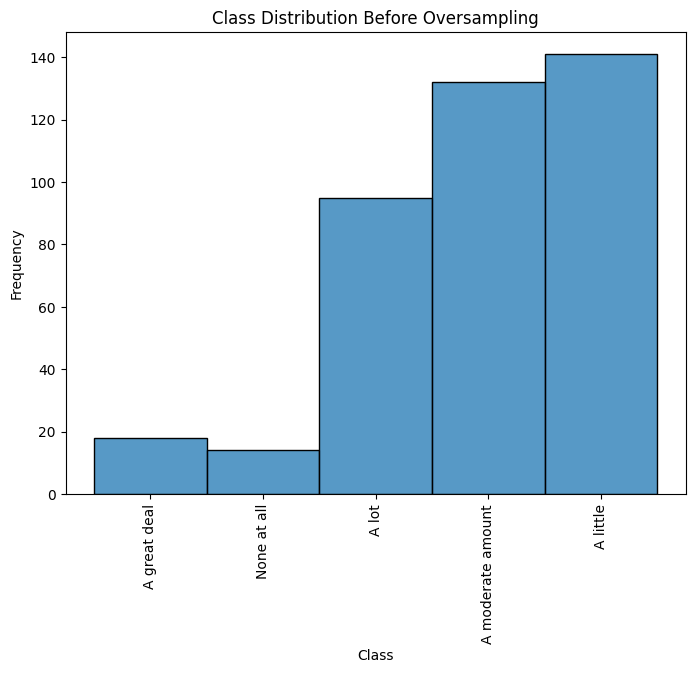

In [ ]:
# Function to plot the bar chart
def plot_class_distribution(y, title):
    plt.figure(figsize=(8, 6))
    sns.histplot(y)
    plt.title(title)
    plt.xlabel('Class')
    plt.xticks(rotation=90, size=10)
    plt.ylabel('Frequency')
    plt.show()

# Plotting class distribution before oversampling
plot_class_distribution(df['concerned'], 'Class Distribution Before Oversampling')

In [ ]:
# Handling Imbalance on the Target column (concerned) using random oversampling

# Splitting the dataset into features and target
X = df.drop('concerned', axis=1)
y = df['concerned']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying RandomOverSampler only on training data
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

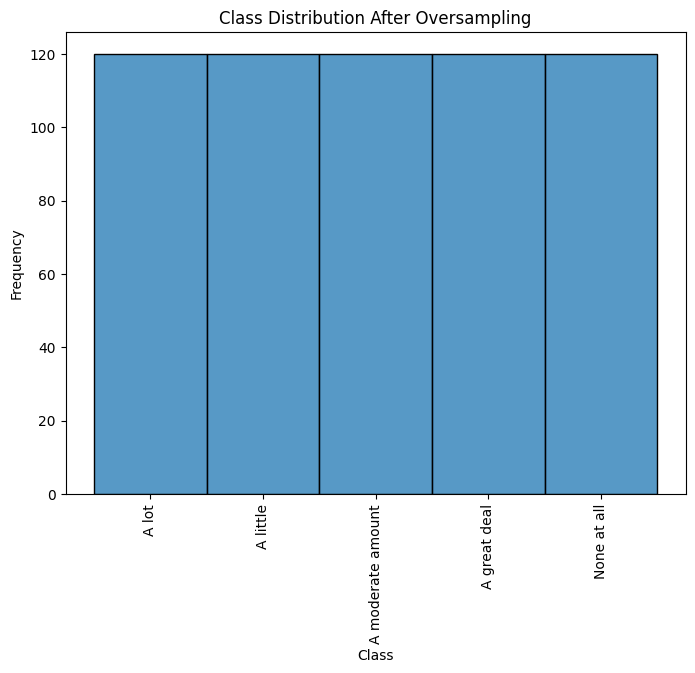

In [ ]:
# Assuming y_train_ros is the target variable after oversampling

plot_class_distribution(y_train_ros, 'Class Distribution After Oversampling')

### Modelling

In [ ]:
# Now, use the oversampled data X_train_ros and y_train_ros for training your model

In [ ]:
# Function to categorize columns based on data type and uniqueness
def get_columns_by_category(X):
    """
    Categorizes columns of the DataFrame into binary, nominal, and numerical based on data types and uniqueness.

    Args:
    X (pd.DataFrame): The DataFrame whose columns need to be categorized.

    Returns:
    tuple: A tuple containing lists of binary, nominal, and numerical columns.
    """
    categorical_mask = X.select_dtypes(include=['object']).apply(pd.Series.nunique) == 2
    numerical_mask = X.select_dtypes(include=['int64', 'float64']).apply(pd.Series.nunique) > 5

    binary_columns = X[categorical_mask.index[categorical_mask]].columns
    nominal_columns = X[categorical_mask.index[~categorical_mask]].columns
    numerical_columns = X[numerical_mask.index[numerical_mask]].columns

    return binary_columns, nominal_columns, numerical_columns

# Get the column categories
binary_columns, nominal_columns, numerical_columns = get_columns_by_category(X_train_ros)

# Create a column transformer pipeline
transformers = [('binary', OrdinalEncoder(), binary_columns),
                ('nominal', OneHotEncoder(), nominal_columns),
                ('numerical', StandardScaler(), numerical_columns)]
transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')

# Stratified K-Fold Cross Validation
Kfold = StratifiedKFold(n_splits=5)

# Define and stack classifiers
RANDOM_STATE = 42
classifiers = [
    LogisticRegression(max_iter=70, solver='sag', random_state=RANDOM_STATE),
    DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE),
    SVC(C=2, kernel='linear', random_state=RANDOM_STATE),
    RandomForestClassifier(max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state=RANDOM_STATE),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=RANDOM_STATE), random_state=RANDOM_STATE),
    GradientBoostingClassifier(learning_rate=0.005, n_estimators=30, random_state=RANDOM_STATE),
    KNeighborsClassifier(),
    GaussianNB(var_smoothing=1e-2)
]

classifiers_names = [
    'Logistic Regression',
    'Decision Tree Classifier',
    'SVC',
    'Random Forest Classifier',
    'AdaBoost Classifier',
    'Gradient Boosting Classifier',
    'K Neighbors Classifier',
    'Gaussian Naive Bayes'
]


from sklearn.base import TransformerMixin

# Custom transformer to convert a sparse matrix to a dense one
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()

# Modify the pipeline to include DenseTransformer for models that require dense input
pipelines = []
for name, clf in zip(classifiers_names, classifiers):
    if name == 'Gaussian Naive Bayes':
        pipeline = Pipeline([('transformer', transformer_pipeline), ('to_dense', DenseTransformer()), (name, clf)])
    else:
        pipeline = Pipeline([('transformer', transformer_pipeline), (name, clf)])
    pipelines.append(pipeline)


# Cross-validation of models
def cv_fit_models(X, y):
    """
    Performs cross-validation on multiple classifiers and collects the training accuracy and CV scores.

    Args:
    X (pd.DataFrame): Features for training.
    y (pd.Series): Target variable.

    Returns:
    tuple: A tuple containing the array of training accuracies and a dictionary of cross-validation scores.
    """
    train_acc_results = []
    cv_scores = {name: [] for name in classifiers_names}
    for name, pipeline in zip(classifiers_names, pipelines):
        cv_score = cross_validate(pipeline, X, y, scoring='accuracy', cv=Kfold, return_train_score=True, return_estimator=True)
        train_accuracy = cv_score['train_score'].mean() * 100
        train_acc_results.append(train_accuracy)
        cv_scores[name].append(cv_score)
    return np.array(train_acc_results), cv_scores

scoring = {'acc': 'accuracy'}
results, folds_scores = cv_fit_models(X_train_ros, y_train_ros)

# Function to pick the best estimator based on test accuracy
def pick_best_estimator(folds_scores):
    """
    Picks the best estimator for each model based on the highest test accuracy.

    Args:
    folds_scores (dict): A dictionary containing cross-validation scores for each classifier.

    Returns:
    dict: A dictionary of best estimators for each classifier.
    """
    best_estimators = {}
    for key, model in folds_scores.items():
        best_acc_idx = np.argmax(model[0]['test_score'])
        best_model = model[0]['estimator'][best_acc_idx]
        best_estimators[key] = best_model
    return best_estimators

best_estimators = pick_best_estimator(folds_scores)

# Function to gather metrics scores
def gather_metrics_scores(best_estimators, X_test, y_test):
    """
    Calculates accuracy, precision, and recall scores for the best estimators.

    Args:
    best_estimators (dict): A dictionary of best estimators for each classifier.
    X_test (pd.DataFrame): Test features.
    y_test (pd.Series): Test target variable.

    Returns:
    dict: A dictionary containing test accuracies, precision, and recall scores.
    """
    test_accs, precisions, recalls = [], [], []
    for estimator in best_estimators.values():
        y_pred = estimator.predict(X_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        score = estimator.score(X_test, y_test)

        test_accs.append(score)
        precisions.append(precision)
        recalls.append(recall)

    scores = {'test_acc': np.array(test_accs),
              'precision': np.array(precisions),
              'recall': np.array(recalls)}

    return scores

scores = gather_metrics_scores(best_estimators, X_test, y_test)

# Function to plot train and test accuracy
def plot_train_test_accuracy(df):
    """
    Plots the train and test accuracy for different models.

    Args:
    df (pd.DataFrame): DataFrame containing model names and their respective accuracies.
    """
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='train_accuracy', y='Model', orient='h', ax=ax[0], order=df.sort_values('train_accuracy', ascending=False).Model)
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_accuracy', y='Model', orient='h', ax=ax[1], order=df.sort_values('test_accuracy', ascending=False).Model)
    ax[1].set_xlim([0, 100])

results_df = pd.DataFrame({
    'Model': classifiers_names,
    'train_accuracy': results,
    'test_accuracy': scores['test_acc'] * 100,
    'test_precision': scores['precision'] * 100,
    'test_recall': scores['recall'] * 100
})



# Function to plot precision and recall
def plot_precision_recall(df):
    """
    Plots the precision and recall for different models.

    Args:
    df (pd.DataFrame): DataFrame containing model names and their respective precision and recall scores.
    """
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='test_precision', y='Model', orient='h', ax=ax[0], order=df.sort_values('test_precision', ascending=False).Model)
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_recall', y='Model', orient='h', ax=ax[1], order=df.sort_values('test_recall', ascending=False).Model)
    ax[1].set_xlim([0, 100])




In [ ]:
results_df

,Model,train_accuracy,test_accuracy,test_precision,test_recall
0,Logistic Regression,76.541667,28.75,29.018395,28.75
1,Decision Tree Classifier,50.541667,32.50,13.612421,32.50
2,SVC,80.583333,33.75,34.252016,33.75
3,Random Forest Classifier,78.958333,27.50,31.573529,27.50
4,AdaBoost Classifier,34.000000,6.25,3.929426,6.25
5,Gradient Boosting Classifier,68.125000,27.50,27.033824,27.50
6,K Neighbors Classifier,76.250000,23.75,25.416479,23.75
7,Gaussian Naive Bayes,65.500000,32.50,24.311975,32.50


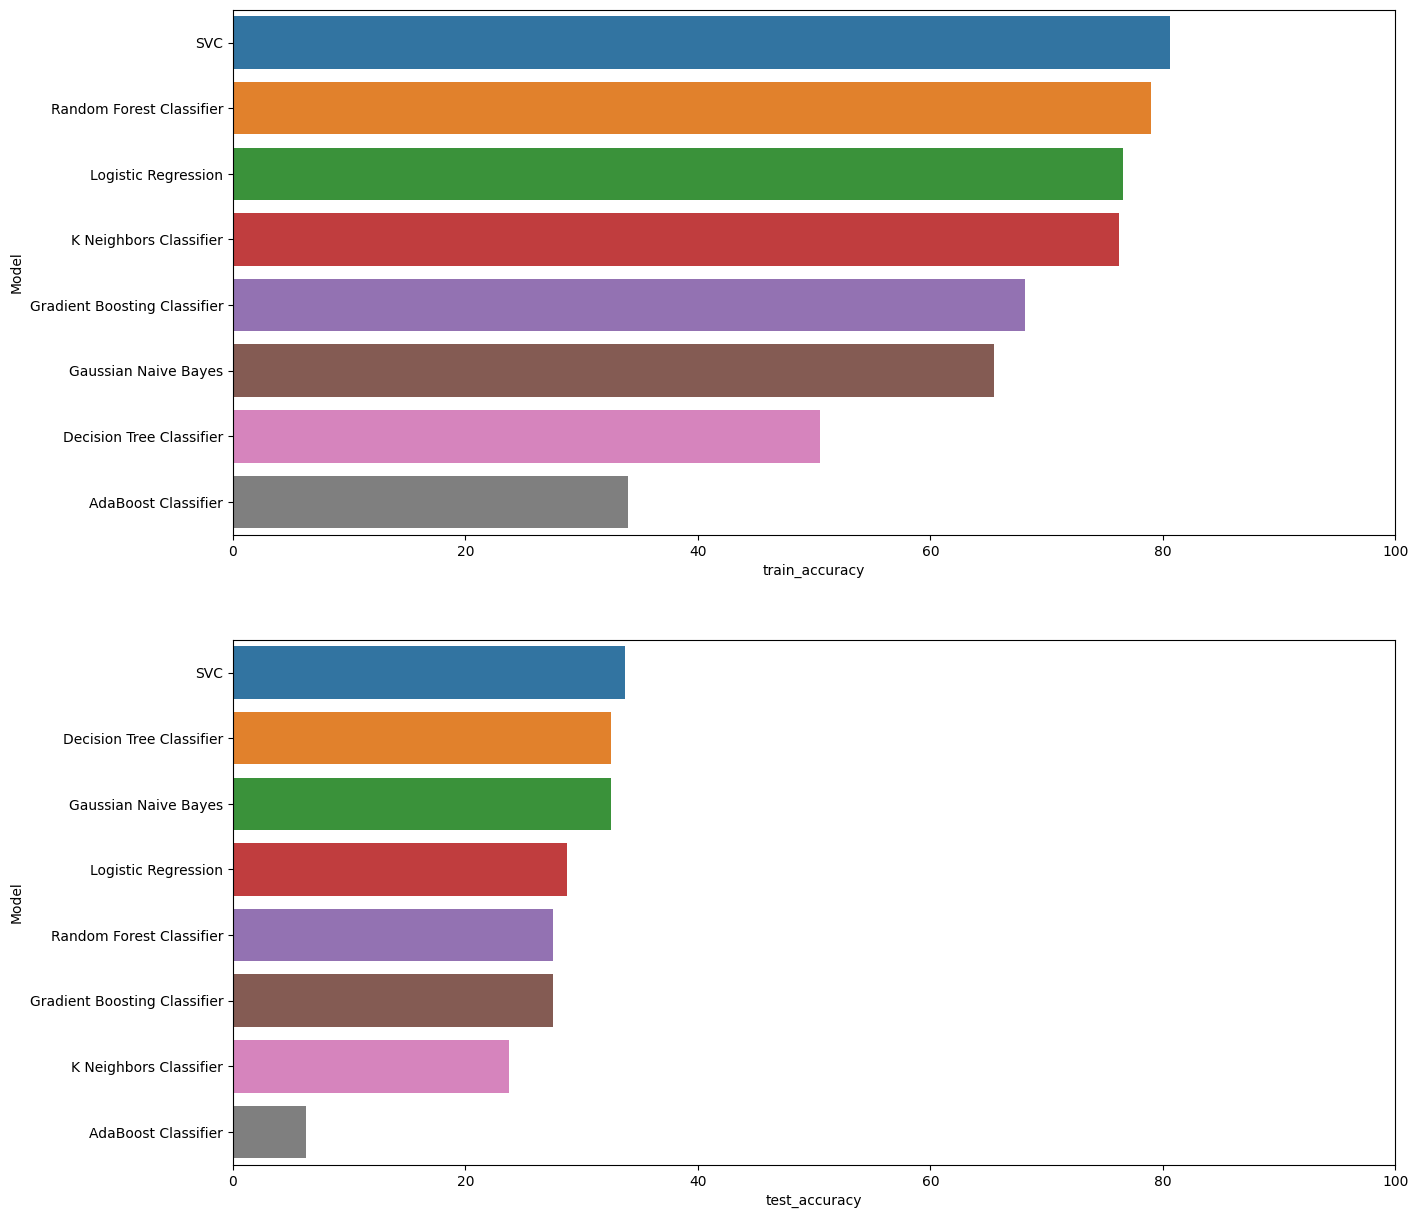

In [ ]:
plot_train_test_accuracy(results_df)

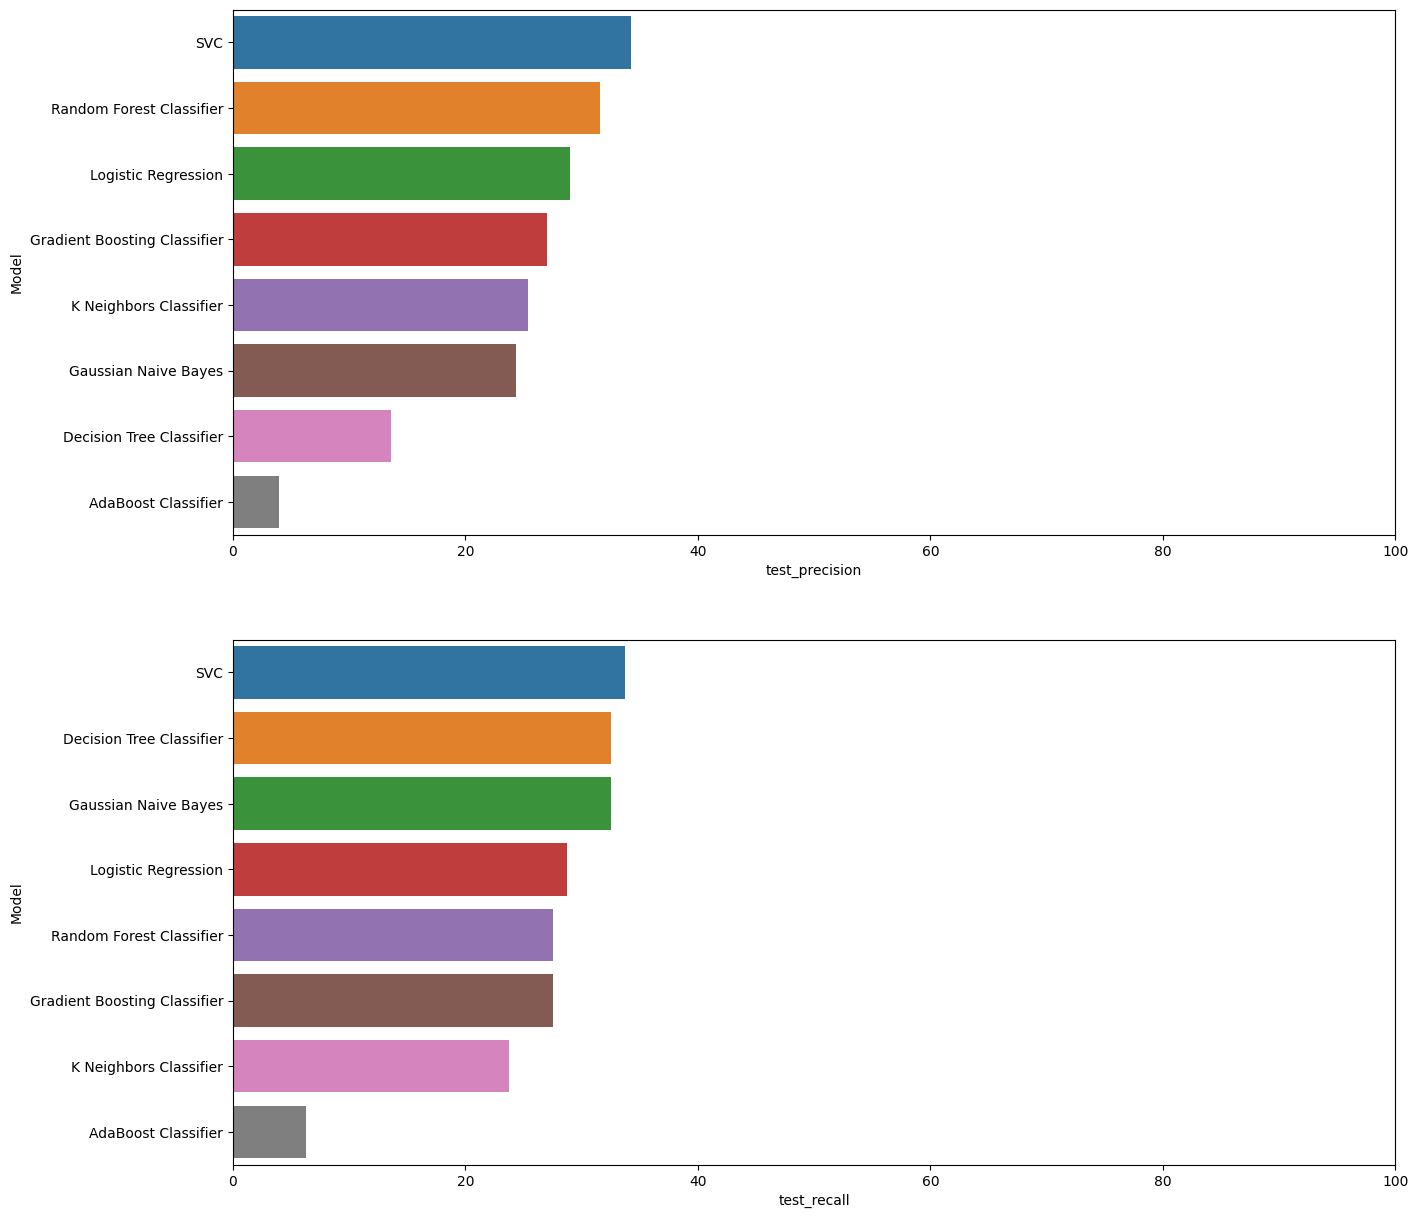

In [ ]:
plot_precision_recall(results_df)

Metrices are not good, let us try feature selection

### Feature Selection

In [ ]:
df_train = pd.concat([X_train_ros, y_train_ros], axis=1)

df_train.head()

,age,gender,education,occupation,frequency,trust_privacy,security_worries,understand_analytics,trust_ethical,comfort_analytics,clarity,awareness,informed_rights,reporting,justification,limitation,education_privacy_ethics,concerned
0,25-34,Male,Master's Degree,Employed Full-Time,Daily,Extremely inadequate,Somewhat disagree,Strongly disagree,Somewhat disagree,Somewhat uncomfortable,Strongly disagree,Strongly disagree,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,Strongly agree,Strongly agree,A lot
1,25-34,Male,Master's Degree,Employed Full-Time,Weekly,Somewhat adequate,Strongly agree,Somewhat agree,Somewhat agree,Neither comfortable nor uncomfortable,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Strongly disagree,Strongly disagree,Somewhat agree,A little
2,25-34,Female,Bachelor's Degree,Employed Full-Time,Daily,Somewhat inadequate,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither comfortable nor uncomfortable,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Somewhat disagree,Somewhat agree,Strongly agree,A moderate amount
3,25-34,Male,Bachelor's Degree,Employed Full-Time,Daily,Somewhat adequate,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat comfortable,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat disagree,Somewhat agree,Somewhat agree,A lot
4,25-34,Male,Master's Degree,Employed Full-Time,Daily,Neither adequate nor inadequate,Somewhat agree,Neither agree nor disagree,Somewhat agree,Somewhat comfortable,Somewhat agree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,A lot


In [ ]:
categorical_cols = df_train.select_dtypes(include=['object']).columns

# Applying LabelEncoder to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       600 non-null    int64
 1   gender                    600 non-null    int64
 2   education                 600 non-null    int64
 3   occupation                600 non-null    int64
 4   frequency                 600 non-null    int64
 5   trust_privacy             600 non-null    int64
 6   security_worries          600 non-null    int64
 7   understand_analytics      600 non-null    int64
 8   trust_ethical             600 non-null    int64
 9   comfort_analytics         600 non-null    int64
 10  clarity                   600 non-null    int64
 11  awareness                 600 non-null    int64
 12  informed_rights           600 non-null    int64
 13  reporting                 600 non-null    int64
 14  justification             600 non-null    

In [ ]:
df_train.corr()

,age,gender,education,occupation,frequency,trust_privacy,security_worries,understand_analytics,trust_ethical,comfort_analytics,clarity,awareness,informed_rights,reporting,justification,limitation,education_privacy_ethics,concerned
age,1.000000,0.197985,0.040073,-0.092697,0.334559,-0.305145,0.154591,0.383365,-0.069549,-0.113307,0.072253,0.287470,0.261508,-0.047090,0.194581,0.122632,0.001351,-0.202557
gender,0.197985,1.000000,-0.069044,-0.012563,0.133623,-0.039918,-0.062492,0.103252,-0.163125,-0.017954,0.002913,0.039907,0.097773,-0.085889,0.020121,0.059634,-0.143487,0.098055
education,0.040073,-0.069044,1.000000,0.524113,0.146392,-0.140188,0.089838,0.072991,0.033063,-0.068222,0.243089,0.198246,0.076250,0.061494,0.139006,0.052799,0.011998,0.273195
occupation,-0.092697,-0.012563,0.524113,1.000000,0.030630,-0.278995,0.252254,0.120420,0.339211,-0.177539,0.459132,0.244050,0.147167,0.160223,0.240387,0.232983,0.237624,0.150415
frequency,0.334559,0.133623,0.146392,0.030630,1.000000,0.030163,-0.116280,0.054125,-0.002560,0.056625,-0.041671,-0.025254,0.006855,-0.165654,-0.015270,-0.133821,-0.066166,-0.061836
trust_privacy,-0.305145,-0.039918,-0.140188,-0.278995,0.030163,1.000000,-0.429529,-0.433251,-0.306429,0.408865,-0.310837,-0.439985,-0.404874,-0.304556,-0.322271,-0.331963,-0.233477,0.208605
security_worries,0.154591,-0.062492,0.089838,0.252254,-0.116280,-0.429529,1.000000,0.486385,0.345119,-0.399622,0.332559,0.466515,0.394362,0.535563,0.409238,0.391883,0.394434,-0.279534
understand_analytics,0.383365,0.103252,0.072991,0.120420,0.054125,-0.433251,0.486385,1.000000,0.206571,-0.360712,0.392826,0.640064,0.544197,0.377826,0.480219,0.549071,0.195842,-0.114048
trust_ethical,-0.069549,-0.163125,0.033063,0.339211,-0.002560,-0.306429,0.345119,0.206571,1.000000,-0.144676,0.330914,0.275684,0.362267,0.410220,0.309905,0.258432,0.314709,-0.219801
comfort_analytics,-0.113307,-0.017954,-0.068222,-0.177539,0.056625,0.408865,-0.399622,-0.360712,-0.144676,1.000000,-0.231517,-0.347722,-0.273584,-0.204709,-0.363984,-0.347990,-0.118181,0.139854


In [ ]:
# Picking the features with best correlation

d_corr= df_train.corr().reset_index()
d_corr[abs(d_corr['concerned'])>0.2][['index','concerned']]

,index,concerned
0,age,-0.202557
2,education,0.273195
5,trust_privacy,0.208605
6,security_worries,-0.279534
8,trust_ethical,-0.219801
17,concerned,1.000000


In [ ]:
X_train_best = X_train_ros[['age', 'education', 'trust_privacy', 'security_worries', 'trust_ethical']]

X_train_best.head()

,age,education,trust_privacy,security_worries,trust_ethical
0,25-34,Master's Degree,Extremely inadequate,Somewhat disagree,Somewhat disagree
1,25-34,Master's Degree,Somewhat adequate,Strongly agree,Somewhat agree
2,25-34,Bachelor's Degree,Somewhat inadequate,Somewhat agree,Neither agree nor disagree
3,25-34,Bachelor's Degree,Somewhat adequate,Somewhat agree,Somewhat agree
4,25-34,Master's Degree,Neither adequate nor inadequate,Somewhat agree,Somewhat agree


In [ ]:
y_train_ros.head()

0                A lot
1             A little
2    A moderate amount
3                A lot
4                A lot
Name: concerned, dtype: object

In [ ]:
# Get the column categories
binary_columns, nominal_columns, numerical_columns = get_columns_by_category(X_train_best)

# Create a column transformer pipeline
transformers = [('binary', OrdinalEncoder(), binary_columns),
                ('nominal', OneHotEncoder(), nominal_columns),
                ('numerical', StandardScaler(), numerical_columns)]
transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')

# Stratified K-Fold Cross Validation
Kfold = StratifiedKFold(n_splits=5)

# Define and stack classifiers
RANDOM_STATE = 42
classifiers = [
    LogisticRegression(max_iter=70, solver='sag', random_state=RANDOM_STATE),
    DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE),
    SVC(C=2, kernel='linear', random_state=RANDOM_STATE),
    RandomForestClassifier(max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state=RANDOM_STATE),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=RANDOM_STATE), random_state=RANDOM_STATE),
    GradientBoostingClassifier(learning_rate=0.005, n_estimators=30, random_state=RANDOM_STATE),
    KNeighborsClassifier(),
    GaussianNB(var_smoothing=1e-2)
]

classifiers_names = [
    'Logistic Regression',
    'Decision Tree Classifier',
    'SVC',
    'Random Forest Classifier',
    'AdaBoost Classifier',
    'Gradient Boosting Classifier',
    'K Neighbors Classifier',
    'Gaussian Naive Bayes'
]


from sklearn.base import TransformerMixin


# Modify the pipeline to include DenseTransformer for models that require dense input
pipelines = []
for name, clf in zip(classifiers_names, classifiers):
    if name == 'Gaussian Naive Bayes':
        pipeline = Pipeline([('transformer', transformer_pipeline), ('to_dense', DenseTransformer()), (name, clf)])
    else:
        pipeline = Pipeline([('transformer', transformer_pipeline), (name, clf)])
    pipelines.append(pipeline)


# Cross-validation of models


scoring = {'acc': 'accuracy'}
results, folds_scores = cv_fit_models(X_train_best, y_train_ros)

best_estimators = pick_best_estimator(folds_scores)

scores = gather_metrics_scores(best_estimators, X_test, y_test)

results_df = pd.DataFrame({
    'Model': classifiers_names,
    'train_accuracy': results,
    'test_accuracy': scores['test_acc'] * 100,
    'test_precision': scores['precision'] * 100,
    'test_recall': scores['recall'] * 100
})

In [ ]:
results_df

,Model,train_accuracy,test_accuracy,test_precision,test_recall
0,Logistic Regression,62.291667,40.00,41.485071,40.00
1,Decision Tree Classifier,50.250000,32.50,13.612421,32.50
2,SVC,65.125000,40.00,39.525563,40.00
3,Random Forest Classifier,64.000000,37.50,41.889493,37.50
4,AdaBoost Classifier,43.166667,26.25,24.479167,26.25
5,Gradient Boosting Classifier,62.958333,37.50,41.541855,37.50
6,K Neighbors Classifier,65.125000,32.50,32.374203,32.50
7,Gaussian Naive Bayes,59.291667,32.50,29.294299,32.50


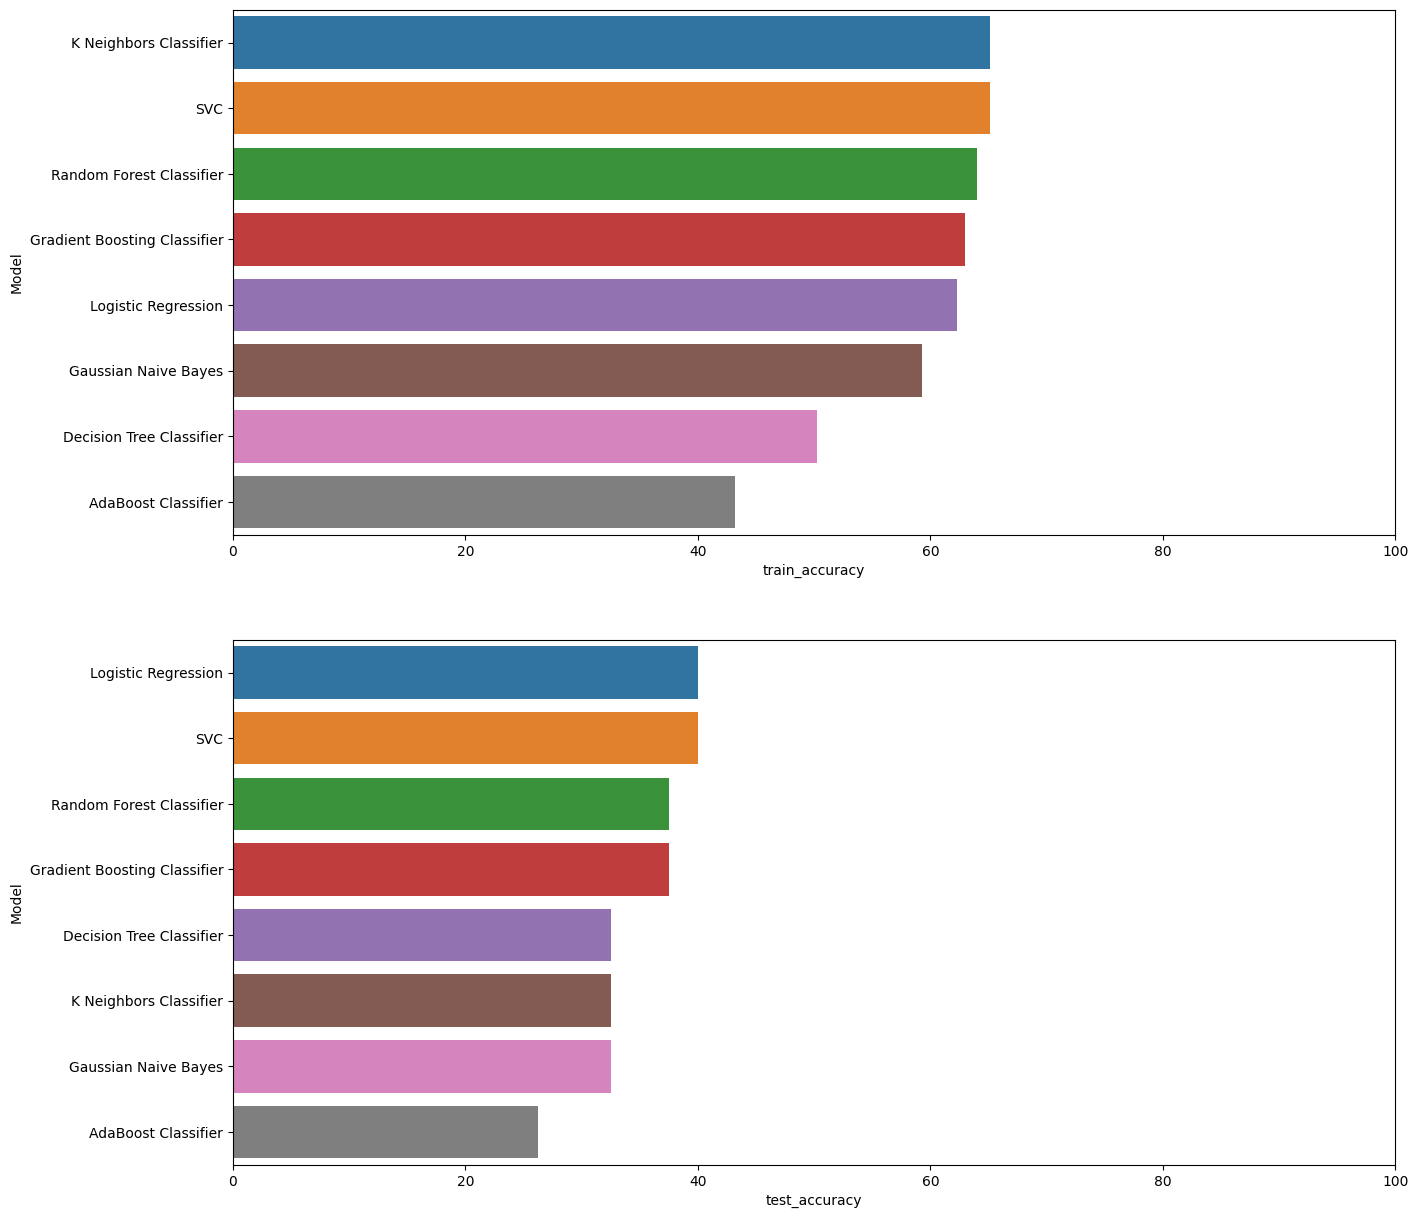

In [ ]:
plot_train_test_accuracy(results_df)

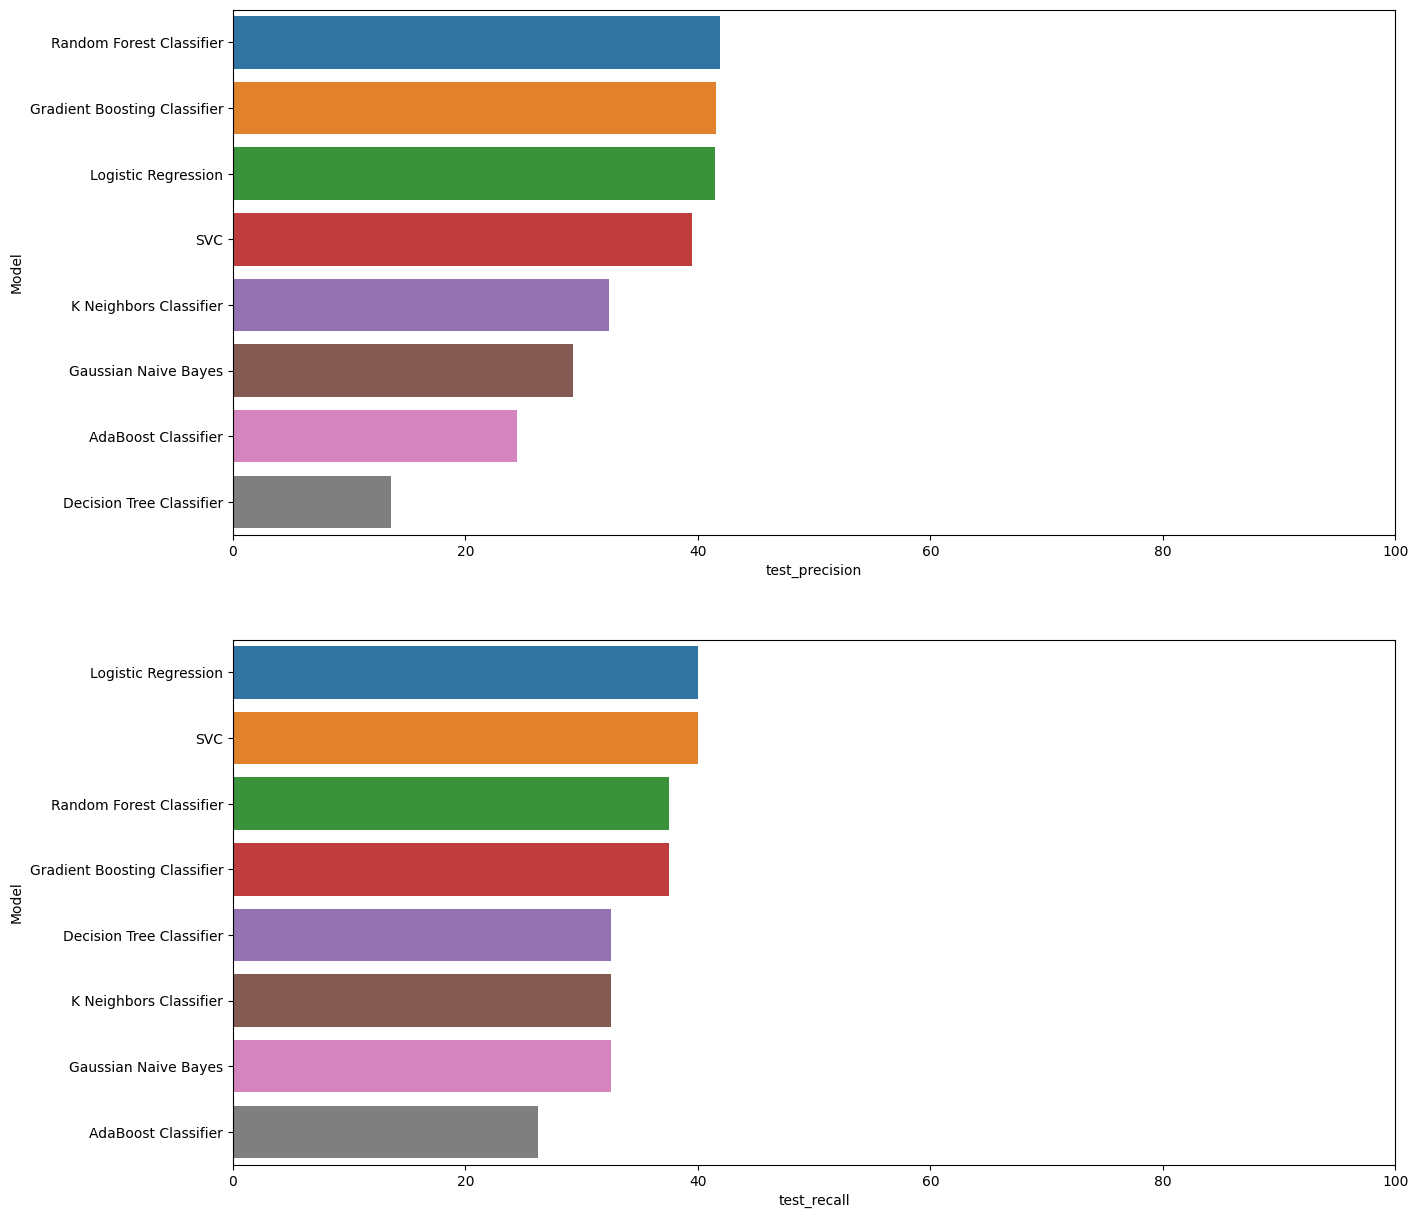

In [ ]:
plot_precision_recall(results_df)

Metrices are quite better.
Seeing Randomforest performed best, let's optimize it.

In [ ]:
# One-Hot Encoding for categorical data
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X_train_best)

# Initialize and evaluate the Random Forest Classifier
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_encoded, y_train_ros)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'accuracy': 'accuracy', 'precision': 'precision_weighted', 'recall': 'recall_weighted', 'f1_score': 'f1_weighted'}
cv_results = cross_validate(rf_model, X_encoded, y_train_ros, cv=cv, scoring=scoring)

# Output the cross-validation results
print("Cross-validation metrics:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy'])}")
print(f"Precision: {np.mean(cv_results['test_precision'])}")
print(f"Recall: {np.mean(cv_results['test_recall'])}")
print(f"F1 Score: {np.mean(cv_results['test_f1_score'])}")

# Save the trained model and encoder
joblib.dump(rf_model, 'random_forest_model.joblib')
joblib.dump(encoder, 'encoder.joblib')


Cross-validation metrics:
Accuracy: 0.6166666666666667
Precision: 0.6212640424917595
Recall: 0.6166666666666667
F1 Score: 0.6035516039469447


['encoder.joblib']

Now, metrices are better after optimizing Random Forest, let's try predict with our inputs

In [ ]:
def get_user_input():
    print("Please provide your responses. Choose from the options provided for each question:")

    responses = {
        "age": input("\n\n1. What's your age? \nOptions: ['25-34', '35-44', '55-64', '18-24', '45-54']: \n----------\n"),
        "education": input("\n\n2. What's your educational level? \nOptions: ['Master's Degree', 'No formal education', "
                           "'Bachelor's Degree', 'Some College', 'High School Graduate', 'Doctorate or higher', "
                           "'Some High School']: \n----------\n"),
        "trust_privacy": input("\n\n3. I trust that my privacy is adequately protected on online platforms. \nOptions: "
                               "['Extremely inadequate', 'Neither adequate nor inadequate', 'Somewhat adequate', "
                               "'Somewhat inadequate', 'Extremely adequate']: \n----------\n"),
        "security_worries": input("\n\n4. The security of my personal data on online platforms often worries me. \nOptions: "
                                  "['Strongly disagree', 'Strongly agree', 'Neither agree nor disagree', "
                                  "'Somewhat disagree', 'Somewhat agree']: \n----------\n"),
        "trust_ethical": input("\n\n5. I trust that online service providers handle my personal data ethically. \nOptions: "
                               "['Somewhat disagree', 'Strongly agree', 'Neither agree nor disagree', "
                               "'Strongly disagree', 'Somewhat agree']: \n----------\n"),
    }
    return pd.DataFrame([responses])

# Load the model and encoder
rf_model = joblib.load('random_forest_model.joblib')
encoder = joblib.load('encoder.joblib')

# Get and preprocess user input
user_input_df = get_user_input()
user_input_encoded = encoder.transform(user_input_df)

# Make and display the prediction
prediction = rf_model.predict(user_input_encoded)
print("\n\n\n\n--------------------------------------\nPredicted Concern Level:", prediction[0])
print('--------------------------------------')


Please provide your responses. Choose from the options provided for each question:


1. What's your age? 
Options: ['25-34', '35-44', '55-64', '18-24', '45-54']: 
----------
25-34


2. What's your educational level? 
Options: ['Master's Degree', 'No formal education', 'Bachelor's Degree', 'Some College', 'High School Graduate', 'Doctorate or higher', 'Some High School']: 
----------
Master's Degree


3. I trust that my privacy is adequately protected on online platforms. 
Options: ['Extremely inadequate', 'Neither adequate nor inadequate', 'Somewhat adequate', 'Somewhat inadequate', 'Extremely adequate']: 
----------
Extremely inadequate


4. The security of my personal data on online platforms often worries me. 
Options: ['Strongly disagree', 'Strongly agree', 'Neither agree nor disagree', 'Somewhat disagree', 'Somewhat agree']: 
----------
Strongly disagree


5. I trust that online service providers handle my personal data ethically. 
Options: ['Somewhat disagree', 'Strongly agree', 